In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [25]:
df = pd.read_csv("C:\SpringBoard\Waste_Management_Project\Dataset\waste_sensor_data.csv", header=None)

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\athar\AppData\Local\Temp\ipykernel_24772\4242928961.py:1: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv("C:\SpringBoard\Waste_Management_Project\Dataset\waste_sensor_data.csv", header=None)


In [26]:
df

,0,1,2,3,4,5,6
0,sensor_id,timestamp,waste_type,inductive_property,capacitive_property,moisture_property,infrared_property
1,3,2023-09-01 12:00:00,non_recyclable,0.9,0.12,0.47,16.27
2,4,2023-09-01 12:15:00,recyclable,1.18,0.66,0.33,36.0
3,3,2023-09-01 12:30:00,non_recyclable,0.87,0.14,0.83,58.89
4,2,2023-09-01 12:45:00,organic,1.0,0.37,0.52,91.8
...,...,...,...,...,...,...,...
19996,4,2024-03-27 18:45:00,non_recyclable,1.3,0.41,0.46,58.57
19997,4,2024-03-27 19:00:00,non_recyclable,0.68,0.87,0.71,12.0
19998,3,2024-03-27 19:15:00,non_recyclable,1.12,0.79,0.07,29.03
19999,2,2024-03-27 19:30:00,organic,1.18,0.05,0.05,40.17


In [27]:
df.shape

(20001, 7)

In [28]:
df.head()

,0,1,2,3,4,5,6
0,sensor_id,timestamp,waste_type,inductive_property,capacitive_property,moisture_property,infrared_property
1,3,2023-09-01 12:00:00,non_recyclable,0.9,0.12,0.47,16.27
2,4,2023-09-01 12:15:00,recyclable,1.18,0.66,0.33,36.0
3,3,2023-09-01 12:30:00,non_recyclable,0.87,0.14,0.83,58.89
4,2,2023-09-01 12:45:00,organic,1.0,0.37,0.52,91.8


In [29]:
df.head()


,0,1,2,3,4,5,6
0,sensor_id,timestamp,waste_type,inductive_property,capacitive_property,moisture_property,infrared_property
1,3,2023-09-01 12:00:00,non_recyclable,0.9,0.12,0.47,16.27
2,4,2023-09-01 12:15:00,recyclable,1.18,0.66,0.33,36.0
3,3,2023-09-01 12:30:00,non_recyclable,0.87,0.14,0.83,58.89
4,2,2023-09-01 12:45:00,organic,1.0,0.37,0.52,91.8


In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       20001 non-null  object
 1   1       20001 non-null  object
 2   2       20001 non-null  object
 3   3       20001 non-null  object
 4   4       20001 non-null  object
 5   5       20001 non-null  object
 6   6       20001 non-null  object
dtypes: object(7)
memory usage: 1.1+ MB


In [31]:
col_names = ['sensor_id','timestamp','waste_type', 'inductive_property', 'capacitive_property', 'moisture_property', 'infrared_property']


df.columns = col_names

col_names

['sensor_id',
 'timestamp',
 'waste_type',
 'inductive_property',
 'capacitive_property',
 'moisture_property',
 'infrared_property']

In [32]:
col_names = ['waste_type', 'inductive_property', 'capacitive_property', 'moisture_property', 'infrared_property']

for col in col_names:
    
    print(df[col].value_counts())   


waste_type
non_recyclable    6729
organic           6653
recyclable        6618
waste_type           1
Name: count, dtype: int64
inductive_property
1.05                  291
0.84                  282
1.12                  281
0.88                  279
0.86                  278
                     ... 
1.02                  212
0.75                  204
1.4                   144
0.6                   110
inductive_property      1
Name: count, Length: 82, dtype: int64
capacitive_property
0.93                   235
0.16                   228
0.54                   226
0.13                   225
0.45                   225
                      ... 
0.97                   174
0.47                   166
1.0                    105
0.0                    104
capacitive_property      1
Name: count, Length: 102, dtype: int64
moisture_property
0.43                 240
0.09                 227
0.85                 226
0.34                 222
0.55                 220
                    ... 
0.08

In [33]:
df['waste_type'].value_counts()

waste_type
non_recyclable    6729
organic           6653
recyclable        6618
waste_type           1
Name: count, dtype: int64

In [34]:
df.isnull().sum()


sensor_id              0
timestamp              0
waste_type             0
inductive_property     0
capacitive_property    0
moisture_property      0
infrared_property      0
dtype: int64

In [35]:
X = df.drop(['sensor_id','timestamp','waste_type'], axis=1)

y = df['waste_type']

In [38]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [39]:
X_train.shape, X_test.shape

((13400, 4), (6601, 4))

In [40]:
X_train.dtypes

inductive_property     object
capacitive_property    object
moisture_property      object
infrared_property      object
dtype: object

In [41]:
X_train.head()

,inductive_property,capacitive_property,moisture_property,infrared_property
13010,0.99,0.4,0.61,34.71
6688,1.13,0.42,0.18,53.81
9976,1.18,0.89,0.52,43.28
5175,1.31,0.14,0.18,2.83
19354,0.8,0.45,0.07,8.43


In [42]:
import category_encoders as ce

In [43]:
encoder = ce.OrdinalEncoder(cols=['inductive_property', 'capacitive_property', 'moisture_property', 'infrared_property'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [44]:
X_train.head()

,inductive_property,capacitive_property,moisture_property,infrared_property
13010,1,1,1,1
6688,2,2,2,2
9976,3,3,3,3
5175,4,4,2,4
19354,5,5,4,5


In [45]:
X_test.head()


,inductive_property,capacitive_property,moisture_property,infrared_property
10650,53.0,21.0,17.0,7276.0
2041,46.0,92.0,100.0,-1.0
8668,25.0,34.0,65.0,6508.0
1114,1.0,9.0,42.0,-1.0
13902,2.0,96.0,35.0,6293.0


In [46]:
X_test

,inductive_property,capacitive_property,moisture_property,infrared_property
10650,53.0,21.0,17.0,7276.0
2041,46.0,92.0,100.0,-1.0
8668,25.0,34.0,65.0,6508.0
1114,1.0,9.0,42.0,-1.0
13902,2.0,96.0,35.0,6293.0
...,...,...,...,...
749,19.0,93.0,28.0,-1.0
611,46.0,52.0,78.0,-1.0
13637,67.0,15.0,94.0,3270.0
11617,38.0,45.0,87.0,5707.0


In [47]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with 10 decision-trees : 0.3365


In [48]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.3365


In [49]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [50]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

infrared_property      0.313639
capacitive_property    0.234575
moisture_property      0.229679
inductive_property     0.222107
dtype: float64

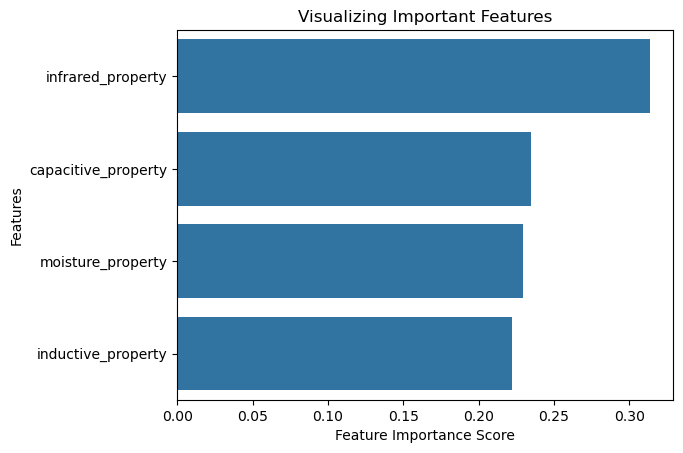

In [51]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

In [52]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [54]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['inductive_property', 'capacitive_property', 'moisture_property', 'infrared_property'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [55]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score 

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with doors variable removed : 0.3365
